<h1><center>Calculating the axion relic density from the EOM</center></h1>

In this lab we will be solving the axion equation of motion numerically and hence calculating the relic density of axion DM today.

## 1) Rewritting our ODE

Given that $\phi=f_a\theta$, where $f_a$ is the scale of PQ symmetry breaking, we can write the EOM for our axion in an expanding universe as

\begin{equation}
    \frac{d^2\theta}{dt^2} + 3H(T)\frac{d\theta}{dt} + \frac{1}{f_a^2}\frac{\partial V(\theta)}{\partial\theta} = 0.
\end{equation}

However, this equation is currently in terms of time derivatives which isn't very convienient since we don't have an equation for $T = T(t)$. We can however, calculate $\frac{dt}{dT}$ and hence rewrite our eom in terms of temperature derivatives.

The expansion is governed by the Friedmann equations

\begin{equation}
   H^2 = \frac{8\pi}{3M_{pl}^2}\rho
\end{equation}

\begin{equation}
    \frac{d\rho}{dt}  = -3H(T)(\rho + p) = -3HsT
\end{equation}

where $\rho$, $p$ and $s$ are the energy density, pressure and entropy density of the early universe and $M_{pl}$ is the Planck mass (<i>Note: g_s(T) is just what we called g_*(T) in last lab sheet</i>). At the temperatures where axion production happens, the contribution of axions to these densities can be neglected.

Therefore, $\rho$ and $s$ can be expressed as

\begin{equation}
    \rho = \frac{\pi^2}{30}g_{\rho}T^4
\end{equation}

\begin{equation}
    s = \frac{2\pi^2}{45}g_{s}T^3
\end{equation}

where $g_{\rho}$ and $g_{s}$ are the effective degrees of freedom for the energy density  and for the entropy density respectively.

<ul>
    <li> Hence show that</li>
</ul>

\begin{equation}
    \frac{dt}{dT} = -M_{pl}\sqrt{\frac{45}{64\pi^3}}\frac{1}{T^3g_s(T)\sqrt{g_{\rho}(T)}}\Big( T \frac{dg_{\rho}(T)}{dT} + 4g_{\rho}(T) \Big)
\end{equation}

<ul>
    <li> Using this, show that our EOM can be written as</li>
</ul>

\begin{equation}
    \frac{d^2\theta}{dT^2} + \Big[3H(T)\frac{dt}{dT} - \frac{d^2 t}{d T^2}/\frac{dt}{dT} \Big]\frac{d \theta}{d T} + \frac{1}{f_a^2}\Big(\frac{dt}{dT}\Big)^2\frac{\partial V(\theta)}{\partial \theta} = 0
\end{equation}


## 2) Calculating $\frac{dt}{dT}$

Recall the following table of values from the last lab sheet:

<table  style= "width:100%">
  <tr>
    <th>$\log_{10}{T}$ [MeV]</th>
    <td>0.0</td><td>0.5</td><td>1.0</td><td>1.25</td><td>1.6</td><td>2.0</td><td>2.15</td><td>2.2</td><td>2.4</td><td>2.5</td><td>3.0</td><td>4.0</td><td>4.3</td><td>4.6</td><td>5.0</td><td>5.45</td>
  </tr>
    
  <tr>
    <th>$g_{\rho}$</th>
    <td>10.71</td><td>10.74</td><td>10.76</td><td>11.09</td><td>13.68</td><td>17.61</td><td>24.07</td><td>29.84</td><td>47.83</td><td>53.04</td><td>73.48</td><td>83.1</td><td>85.56</td><td>91.97</td><td>102.17</td><td>104.98</td>
  </tr>
  <tr>
    <th>$\frac{g_{\rho}}{g_{s}}$</th>
    <td>1.00228</td><td>1.00029</td><td>1.00048</td><td>1.00505</td><td>1.02159</td><td>1.02324</td><td>1.05423</td><td>1.07578</td><td>1.06118</td><td>1.0469</td><td>1.01778</td><td>1.00123</td><td>1.00389</td><td>1.00887</td><td>1.0075</td><td>1.00023</td>
  </tr>
</table>

#### Tasks

<ul>
    <li> Use <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d">scipy.interpolate.interp1d</a> or otherwise to create splines of $g_{\rho}$, $g_{s}$ and $\frac{dt}{dT}$.
    </li>
    <li> Then, using <a href="https://numpy.org/doc/1.18/reference/generated/numpy.gradient.html">numpy.gradient</a> calcuate and spline $\frac{d^2t}{dT^2}$
    </li>
    <li>Check these by plotting the splined curves along with the original data.
    </li>
</ul>

<i>Hint: To get a smooth approximation for $\frac{d^2t}{dT^2}$, it might be best to calculate this using the splined version of $\frac{dt}{dT}$.</i>

In [1]:
from scipy.interpolate import interp1d
import numpy as np

# Your code here

## 3) Solving our ODE (simplified case)

The potential for the axion field is given by

\begin{equation}
    V(\theta) = m_a^2(T)f_a^2(1 - \cos\theta) = \chi(T)(1-\cos\theta)
\end{equation}

We will start by some axion-like-particle (ALP) whose mass is temperture independent and assuming that our $\theta$ angle is small. 

This enables us to simplify our potential to 

\begin{equation}
    V(\theta) = \frac{1}{2}f_a^2m_a^2\theta^2
\end{equation}

Our equation of motion is then 

\begin{equation}
    \frac{d^2\theta}{dT^2} + \Big[3H(T)\frac{dt}{dT} - \frac{d^2 t}{d T^2}/\frac{dt}{dT} \Big]\frac{d \theta}{d T} + \Big(\frac{dt}{dT}\Big)^2m_a^2\theta = 0
\end{equation}

Unlike the Boltzmann equation in the last lab sheet, which was a first order ODE, we are now faced with solving a second order ODE. Forunately, we can still use `odeint`. An example of how to do this is shown below.

#### Tasks

<ul>
    <li> Use this example to solve the ODE over some <i>appropriate</i> temperature range for $\theta_i = 1$, $mass = 4 \times 10^{-15}$ GeV.</li>
    <li> Plot the decay as a function of temperature </li>
</ul>

<i> 
Hint 1: We only need to solve the field for temperatures around the point at which the axion field begins to oscillate $T_{osc}$. This is given by $3H(T_{osc}) \approx m_a(T_{osc})$.
    
Hint 2: Over the course of our simulation, our temperatures will change by orders of magnitude. It is therefore best to make the temperature steps we give to `odeint` <b>logspaced</b>.
</i>

### Example: Solving 2nd order ODE

Consider the classic (and very appropriate) example of a mass on a spring. 

The spring exerts an upwards force of $F_{spring} = kd$ where $k$ is the spring constant and $d$ is the displacement of the mass some origin (d = -x). Meanwhile, the weight of the mass pulls down with force $F_{m} = mg$ where $m$ is its mass and $g \approx 10$ is the acceleration due to gravity. To make it slightly more interesting we will also add a frictional term $F_{fric} = f\frac{dx}{dt}$

Using Newtons second law we then have

\begin{equation}
    \frac{d^2x}{dt^2} + \frac{xd+mg}{m} +\frac{f}{m}\frac{dx}{dt} = 0
\end{equation}

We can then turn this into two first order ODEs:

\begin{equation}
    \omega = \frac{dx}{dt}
\end{equation}

\begin{equation}
    \frac{d\omega}{dt} = -\frac{kx+mg}{m} - \frac{f}{m}\omega
\end{equation}

these are then the equations that we will be using with `odeint`.

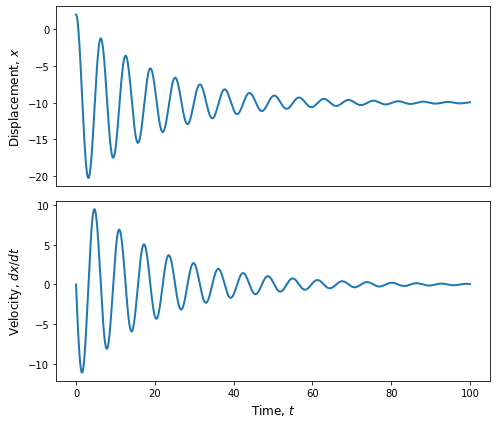

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

g = 10 # Acceleration due to gravity (m/s^2)

# Define our ODE
def ode(y, t, k, m, f):
    # both x and dx/dt are given in y
    x, omega = y 
    
    omega_deriv = (- k*x - m*g)/m - (f/m)*omega
    
    derivs = [omega, # This hasn't been changed
              omega_deriv] # This is our second derivative
    
    return derivs
    
k = 1 # Spring constant (kg/s^2)
m = 1 # Mass (kg)
f = 0.1 # friction coefficient (kg/s)
    
# initial values [x, dx/dt]    
y0 = [2.0, 0.0]

t = np.linspace(0, 100, 10000)

soln = odeint(ode, y0, t, args = (k, m, f))

fig = plt.figure(figsize = (7, 6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(t, soln[:,0], lw = 2)
ax1.set_ylabel("Displacement, $x$", size = 12);
ax1.set_xticks([])

ax2.plot(t, soln[:,1], lw = 2)
ax2.set_ylabel("Velocity, $dx/dt$", size = 12);

ax2.set_xlabel("Time, $t$", size = 12);
plt.tight_layout()

## 4) Calculating the relic density

The axion density is given by 

\begin{equation}
    \rho_a = \frac{f_a^2}{2}\Big(\frac{d \theta}{dt}\Big)^2 + V(\theta)
\end{equation}

We can use this to calculate the axion number density $n_a$. Then, recalling that $\frac{n}{s}$ is a <i>conserved</i> quantity, we can calculate the number density today $n_0$ using the fact that todays entropy density is given by

\begin{equation}
    s_0 = \frac{2\pi^2}{45} (2T_{\gamma}^3  + 6\frac{7}{8}T_{\nu}^3) = \frac{2\pi^2}{45}\frac{43}{11}T_{\gamma}^3
\end{equation}

Turning this back into an energy density using the mass at $T_0$ (the same for the temperature independant mass case), we can compute the relic density using

\begin{equation}
    \Omega_a = \frac{\rho_a}{\rho_c}
\end{equation}

#### Tasks

<ul>
    <li> Taking $f_a = 10^{12}$ GeV, use your solution to calculate $\rho_a$ and $n_a$ as a function of temperature (Make sure you first convert the above equation for $\rho_a$ into one using derivatives with respect to temperature). 
    </li>
    <li> Plot $\rho_a$ and $n/s$ as a function of temperature.
        <ul>
            <li>Has your $n/s$ curve converged to a constant value?</li>
        </ul>
    </li>
    <li> Calculate $\Omega_ah^2$ using the final value of $n/s$ from your simulation.
            <ul>
            <li>How does this change if you change $\theta_i$ or $m_a$?</li>
        </ul>
    </li>
</ul>

<i>Hint: You can use the $\rho_c = 8.1\times10^{-47}$ $h^{2}$ GeV $^4$ and $T_0 = 2.35 \times 10^{13}$ GeV.</i>

In [3]:
# Your code here


## 5) Temperature dependent mass

Unfortunately we know that the mass of the QCD axion <b>is</b> temperature dependent. So we will have to do a little more work. 

The temperature dependence of the axion mass arises due to the susceptibility of the topological charge $\chi(T)$ via the equation

\begin{equation}
    m_a^2 = \frac{\chi(T)}{f_a^2}.
\end{equation}

Like with $g_s$ and $g_{\rho}$, it's temperature dependent value is determined via lattice QCD.

The following values are also from <a href="https://arxiv.org/abs/1606.07494">Lattice QCD for Cosmology</a>. 

<table  style= "width:30%; background-color: #e1e1e1;">
<tr><th>$T$ [MeV]</th><th>$-\log_{10}(\chi [\mathrm{fm}^{-4}])$</th></tr> 
<tr><td>100</td><td>-1.665</td></tr> 
<tr><td>100</td><td>-1.665</td></tr>
<tr><td>120</td><td>-1.657</td></tr>
<tr><td>140</td><td>-1.759</td></tr>
<tr><td>172</td><td>-2.185</td></tr>
<tr><td>200</td><td>-2.726</td></tr>
<tr><td>240</td><td>-3.396</td></tr>
<tr><td>290</td><td>-4.116</td></tr>
<tr><td>350</td><td>-4.746</td></tr>
<tr><td>420</td><td>-5.347</td></tr>
<tr><td>500</td><td>-5.908</td></tr>
<tr><td>600</td><td>-6.499</td></tr>
<tr><td>720</td><td>-7.0811</td></tr>
<tr><td>860</td><td>-7.6713</td></tr>
<tr><td>1000</td><td>-8.1715</td></tr>
<tr><td>1200</td><td>-8.7917</td></tr>
<tr><td>1500</td><td>-9.562</td></tr>
<tr><td>1800</td><td>-10.2023</td></tr>
<tr><td>2100</td><td>-10.7526</td></tr>
<tr><td>2500</td><td>-11.3828</td></tr>
<tr><td>3000</td><td>-12.0533</td></tr>
</table>

#### Tasks

<ul>
    <li> Use <a href="https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d">scipy.interpolate.interp1d</a> or otherwise to create a spline $\chi(T)$.
        <ul><li>The data is only given for a limited temperature range. However, we can extrapolate these values to high and low $T$. An example of how to do this is given below</li></ul></li>
    <li>Check this by plotting the splined curve along with the original data.
    </li>
</ul>

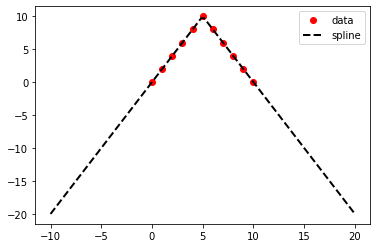

In [9]:
xdata = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ydata = np.array([0, 2, 4, 6, 8, 10, 8, 6, 4, 2, 0])

yspline = interp1d(xdata, ydata, bounds_error = False, fill_value="extrapolate")

plt.plot(xdata, ydata, 'ro', label = "data")

x2 = np.linspace(-10, 20, 100)
plt.plot(x2, yspline(x2), 'k--', lw = 2, label = "spline")
plt.legend();

#### Tasks 
<ul> <li> Write down the new ODE for the temperature dependent axion mass
    </li>
    <li> Use this the write a new ODE solver and hence calculate $\theta$ and a function of temperature for $f_a = 10^{12}$ GeV (Note: $T_{osc}$ is now different).
    </li>
    <li> Recalculate $\rho_a$, $n/s$ and hence $\Omega_a$.
    </li>
</ul>

For this scale ($f_a = 10^{12}$ GeV) the zero-temperature mass $m_a(T=0) = 4 \times 10^{-15}$ GeV. However, you should notice that the relic density is different. Why do you think this is?

</br></br>

<i>
Hint 1: Your solver will now require $f_a$ as an input instead of the mass.

Hint 2: Be careful with the units for $\chi(T)$. These should be consistent with all other units in the problem.
</i>

In [5]:
# Your code here

def newODE():
    return 0

## 6) Finding the correct relic density

We can now repeat this process over a range of values of $f_a$ and $\theta_i$ similarly to part 7 of the lab sheet on calculating the WIMP relic density.

<ul>
    <li>Calulate $\Omega_{a}h^2$ for $\theta_i \in \{10^{-4}, \pi\}$ and $f_a \in \{10^{8}, 10^{14}\}$ GeV. That is, make a 2D array containing the relic density for each combination of initial angle and decay constant.</li>
    <li>Plot the result using <a href = "https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.contourf.html">matplotlib.pyplot.contourf</a>. </li>
    <li>Add to your graph a single contour line indicating the values which give us the observed relic density of $\Omega_{DM}h^2 = 0.12$. An example of how to do this is included <a href="https://matplotlib.org/3.1.0/gallery/images_contours_and_fields/contourf_demo.html#sphx-glr-gallery-images-contours-and-fields-contourf-demo-py">here</a>.</li>
    <li> How does this compare to our approximate solution from question 7 of problem sheet 5?</li>
</ul>

<i>Hint: You will have to reinstate some value of "little h" $h$</i>

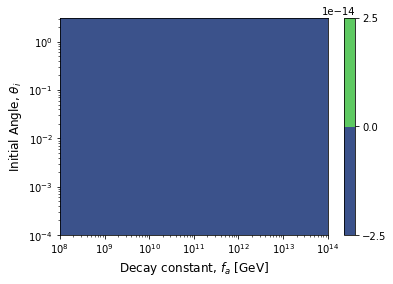

In [6]:
theta_i = np.logspace(-4, np.log10(np.pi), 10)
f_as = np.logspace(8, 14, 10)

Omega_a = np.ones((10,10))

plt.contourf(f_as, theta_i, np.log10(Omega_a))
plt.colorbar()
plt.ylabel(r"Initial Angle, $\theta_i$", size = 12);
plt.xlabel(r"Decay constant, $f_a$ [GeV]", size = 12);
plt.xscale("log")
plt.yscale("log")

## 7) Anharmonic corrections

Finally there is one more approximation we should address. Given our approximated potential, our calculation above is only valid for small misalignment angles $\theta_i$.

Recall that the full potential is given by

\begin{equation}
    V(\theta) = \chi(T)(1-\cos\theta)
\end{equation}

#### Tasks
<ul>
    <li> Rewrite your ODE and ODE solver one last time to include the full potential
    </li>
    <li> Make a new contourf plot of $\Omega_a$ as done above.
    <ul>
        <li> In what region do the values for this approach disagree with the one above?</li>
        <li> How is it different and why?</li>
    </ul>
    </li>
</ul>
   
<i>Hint: You will have to reduce the upper limit of your $\theta_i$ range to be slightly below $\pi$.</i>

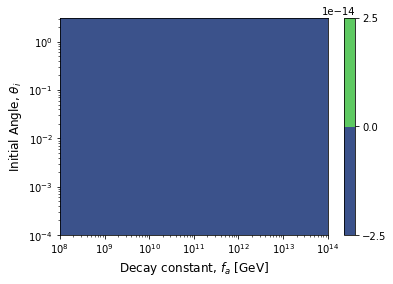

In [7]:
theta_i = np.logspace(-4, np.log10(np.pi), 10)
f_as = np.logspace(8, 14, 10)

Omega_a = np.ones((10,10))

plt.contourf(f_as, theta_i, np.log10(Omega_a))
plt.colorbar()
plt.ylabel(r"Initial Angle, $\theta_i$", size = 12);
plt.xlabel(r"Decay constant, $f_a$ [GeV]", size = 12);
plt.xscale("log")
plt.yscale("log")

## 8) Compare to Approximate Solution

Following an analytical approach similar to lecture 11, we can derive the following equation for the axion relic density (see <a href="https://arxiv.org/abs/1610.01639">Ballesteros et. al</a> for details).

\begin{equation}
    \Omega_a h^2 \approx 0.35 \Big(\frac{\theta_i}{10^{-3}} \Big)^2 \times \begin{cases}
    \Big(\frac{f_a}{3\times10^{17}\mathrm{GeV}}\Big)^{1.17} (f_a \lesssim 3\times10^{17}\mathrm{GeV}),\\
    \Big(\frac{f_a}{3\times10^{17}\mathrm{GeV}}\Big)^{1.54} (f_a \gtrsim 3\times10^{17}\mathrm{GeV}),
    \end{cases} 
\end{equation}

#### Tasks

<ul>
    <li> Calculate and plot $\Omega_a h^2$ using this equation.</li>
    <li> How does your numerical solution compare?</li>
</ul>